<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

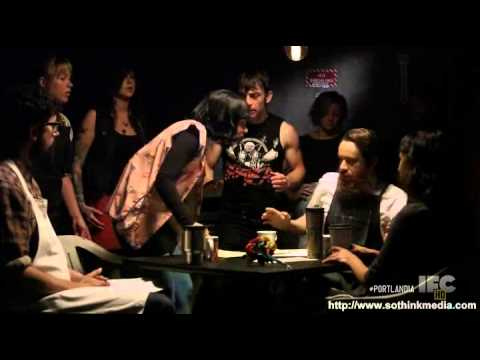

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [6]:
%pwd

'/Users/Tinaren/Desktop/LambdaSchool/Unit4/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [1]:
import pandas as pd

url = "/Users/Tinaren/Desktop/LambdaSchool/Unit4/DS-Unit-4-Sprint-1-NLP/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [2]:
shops.dtypes

coffee_shop_name    object
full_review_text    object
star_rating         object
dtype: object

In [3]:
shops['coffee_shop_name'].value_counts()

Epoch Coffee                            400
Halcyon                                 300
The Factory - Cafe With a Soul          244
Venezia Italian Gelato                  200
Houndstooth Coffee                      200
                                       ... 
Lucky Lab Coffee                         25
Sister Coffee                            17
Kowabunga Coffee                         16
The Marvelous Vintage Tea Party Co.      10
Lola Savannah Coffee Downtown             4
Name: coffee_shop_name, Length: 79, dtype: int64

In [4]:
shops['star_rating'].value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

In [5]:
shops['full_review_text'].value_counts()[:5]

 11/2/2016 2 check-ins Love this place!  5 stars for cleanliness 5 stars for fun ambiance/ open space 5 stars for ample seating and comfort 5 stars for convenient parking 5 stars for attentive employees and fast service  I am definitely a fan Cafe w/ a Soul. I finally found a coffee shop I can study at without sacrificing comfort (Starbucks' uncomfortable chairs). The coffee shop endorses social connection, hence, wifi  isn't available. It makes me really happy that a lot of students hang out here with their book bags and laptops and we can all just study in peace and somehow quiet (the background music can get pretty loud). Unfortunately, there will always be that kid who's obnoxiously loud and would like the whole world to know her business. Seriously, unless it's something intriguing or educational, no one cares. In addition, as much "fun" as this place looks, it's not child friendly. So parents, make sure your children do not hit the table in front of it and knock out the chess set

In [6]:
shops.isnull().sum()

coffee_shop_name    0
full_review_text    0
star_rating         0
dtype: int64

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [24]:
import re
shops['clean_rating'] = shops['star_rating'].apply(lambda x: int(re.sub('[^1-5]', '', x)))
shops['clean_review'] = shops['full_review_text'].apply(lambda x: re.sub('[\d/]', '', x))

In [8]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,clean_rating,clean_review
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,5,check-in Love love loved the atmosphere! Ev...
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,4,"Listed in Date Night: Austin, Ambiance in Au..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,4,check-in Listed in Brunch Spots I loved the...
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2,Very cool decor! Good drinks Nice seating H...
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,4,check-in They are located within the Northc...


In [11]:
shops['clean_rating'].dtype

dtype('int64')

In [12]:
# convert text to tokens
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [25]:
# Tokenizer Pipe

tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(shops['clean_review'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [26]:
shops['tokens'].head()

0    [   , check-in, Love, love, loved, the, atmosp...
1    [  , Listed, in, Date, Night:, Austin,, Ambian...
2    [   , check-in, Listed, in, Brunch, Spots, I, ...
3    [  , Very, cool, decor!, Good, drinks, Nice, s...
4    [   , check-in, They, are, located, within, th...
Name: tokens, dtype: object

In [16]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
shops['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(20)

[('the', 27779),
 ('and', 25748),
 ('a', 22085),
 ('I', 19780),
 (' ', 17390),
 ('to', 16904),
 ('of', 12495),
 ('is', 11748),
 ('was', 9539),
 ('in', 8901),
 ('for', 8244),
 ('coffee', 7318),
 ('The', 6812),
 ('it', 6370),
 ('with', 6103),
 ('but', 5701),
 ('that', 5607),
 ('  ', 5063),
 ('my', 5004),
 ('you', 4966)]

In [17]:
nlp.Defaults.stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [54]:
# Spacy's Default Stop Words plus custom
STOP_WORDS = nlp.Defaults.stop_words.union([' ', '  ', '   ', '-', "coffee", "latte", "drink", "place"])

In [55]:
STOP_WORDS

{' ',
 '  ',
 '   ',
 "'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 '-',
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'coffee',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'drink',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',

In [56]:
tokens = []

for doc in tokenizer.pipe(shops['clean_review'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops['no_stopwords_tokens'] = tokens

In [57]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,clean_rating,clean_review,tokens,no_stopwords_tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,5,check-in Love love loved the atmosphere! Ev...,"[ , check-in, Love, love, loved, the, atmosp...","[check-in, love, love, loved, atmosphere!, cor..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,4,"Listed in Date Night: Austin, Ambiance in Au...","[ , Listed, in, Date, Night:, Austin,, Ambian...","[listed, date, night:, austin,, ambiance, aust..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,4,check-in Listed in Brunch Spots I loved the...,"[ , check-in, Listed, in, Brunch, Spots, I, ...","[check-in, listed, brunch, spots, loved, eclec..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2,Very cool decor! Good drinks Nice seating H...,"[ , Very, cool, decor!, Good, drinks, Nice, s...","[cool, decor!, good, drinks, nice, seating, ho..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,4,check-in They are located within the Northc...,"[ , check-in, They, are, located, within, th...","[check-in, located, northcross, mall, shopping..."


In [51]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [58]:
wc_all = count(shops['no_stopwords_tokens'])

In [59]:
wc_all

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
86,great,2438,3250,1.0,0.008716,0.008716,0.320116
236,it's,2061,3117,2.0,0.008359,0.017075,0.270614
155,like,2034,2902,3.0,0.007783,0.024858,0.267069
170,good,2084,2779,4.0,0.007453,0.032311,0.273634
31,check-in,1957,1961,5.0,0.005259,0.037570,0.256959


In [63]:
bad_reviews = shops[shops['clean_rating']<=3]
good_reviews = shops[shops['clean_rating']>3]

In [48]:
bad_reviews['clean_rating'].value_counts()

3    738
2    460
1    278
Name: clean_rating, dtype: int64

In [49]:
good_reviews['clean_rating'].value_counts()

5    3780
4    2360
Name: clean_rating, dtype: int64

In [64]:
wc_bad = count(bad_reviews['no_stopwords_tokens'])
wc_bad.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
0,like,548,834,1.0,0.010079,0.010079,0.371274
191,it's,414,617,2.0,0.007456,0.017535,0.280488
17,good,441,599,3.0,0.007239,0.024773,0.298780
194,don't,340,430,4.0,0.005196,0.029970,0.230352
102,i'm,305,422,5.0,0.005100,0.035069,0.206640


In [65]:
wc_good = count(good_reviews['no_stopwords_tokens'])
wc_good.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
86,great,2174,2902,1.0,0.010002,0.010002,0.354072
205,it's,1647,2500,2.0,0.008617,0.018619,0.268241
310,good,1643,2180,3.0,0.007514,0.026133,0.267590
203,like,1486,2068,4.0,0.007128,0.033261,0.242020
34,love,1263,1604,5.0,0.005529,0.038790,0.205700


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [36]:
#lemmatization
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.text.lower() not in STOP_WORDS) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [37]:
from tqdm import tqdm 
tqdm.pandas()

/Users/Tinaren/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-IjJj_b1W/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [67]:
bad_reviews['lemmas'] = bad_reviews['clean_review'].progress_apply(get_lemmas)

100%|██████████| 1476/1476 [00:58<00:00, 25.26it/s]
/Users/Tinaren/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-IjJj_b1W/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
bad_reviews.head()

,coffee_shop_name,full_review_text,star_rating,clean_rating,clean_review,tokens,no_stopwords_tokens,lemmas
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2,Very cool decor! Good drinks Nice seating H...,"[ , Very, cool, decor!, Good, drinks, Nice, s...","[cool, decor!, good, drinks, nice, seating, ho...","[cool, decor, good, drink, nice, seating, over..."
8,The Factory - Cafe With a Soul,"10/25/2016 1 check-in Ok, let's try this appr...",3.0 star rating,3,"check-in Ok, let's try this approach... Pr...","[ , check-in, Ok,, let's, try, this, approac...","[check-in, ok,, let's, try, approach..., pros:...","[check, ok, let, try, approach, pro, music, Se..."
11,The Factory - Cafe With a Soul,"11/20/2016 The store has A+ decoration, but h...",3.0 star rating,3,"The store has A+ decoration, but honestly, t...","[ , The, store, has, A+, decoration,, but, ho...","[store, a+, decoration,, honestly,, good, shop...","[store, a+, decoration, honestly, good, shop, ..."
12,The Factory - Cafe With a Soul,11/17/2016 1 check-in Listed in 2016 - The Th...,3.0 star rating,3,check-in Listed in - The Third Time is a C...,"[ , check-in, Listed, in, , -, The, Third, ...","[check-in, listed, time, charm!, factory, a+, ...","[check, list, time, Charm, Factory, a+, decor,..."
25,The Factory - Cafe With a Soul,"12/2/2016 Okay, so after visiting my friends ...",1.0 star rating,1,"Okay, so after visiting my friends in LA and...","[ , Okay,, so, after, visiting, my, friends, ...","[okay,, visiting, friends, la, trying, mint, m...","[okay, visit, friend, LA, try, mint, mojito, i..."


In [69]:
good_reviews['lemmas'] = good_reviews['clean_review'].progress_apply(get_lemmas)

100%|██████████| 6140/6140 [02:35<00:00, 39.44it/s]
/Users/Tinaren/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-IjJj_b1W/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [71]:
good_reviews.head()

,coffee_shop_name,full_review_text,star_rating,clean_rating,clean_review,tokens,no_stopwords_tokens,lemmas
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,5,check-in Love love loved the atmosphere! Ev...,"[ , check-in, Love, love, loved, the, atmosp...","[check-in, love, love, loved, atmosphere!, cor...","[check, Love, love, love, atmosphere, corner, ..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,4,"Listed in Date Night: Austin, Ambiance in Au...","[ , Listed, in, Date, Night:, Austin,, Ambian...","[listed, date, night:, austin,, ambiance, aust...","[list, Date, Night, Austin, Ambiance, Austin, ..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,4,check-in Listed in Brunch Spots I loved the...,"[ , check-in, Listed, in, Brunch, Spots, I, ...","[check-in, listed, brunch, spots, loved, eclec...","[check, list, Brunch, Spots, love, eclectic, h..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,4,check-in They are located within the Northc...,"[ , check-in, They, are, located, within, th...","[check-in, located, northcross, mall, shopping...","[check, locate, Northcross, mall, shopping, ce..."
5,The Factory - Cafe With a Soul,11/20/2016 1 check-in Very cute cafe! I think...,4.0 star rating,4,check-in Very cute cafe! I think from the m...,"[ , check-in, Very, cute, cafe!, I, think, f...","[check-in, cute, cafe!, think, moment, stepped...","[check, cute, cafe, think, moment, step, find,..."


In [74]:
import squarify
import matplotlib.pyplot as plt

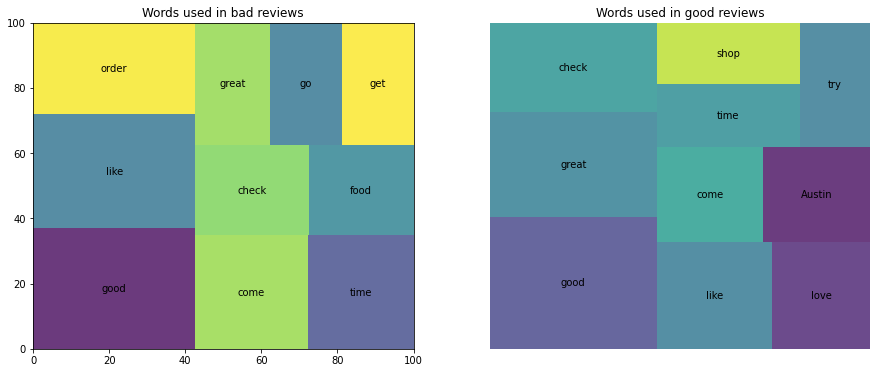

In [75]:
wc_bad_lemmas = count(bad_reviews['lemmas'])
wc_good_lemmas = count(good_reviews['lemmas'])

wc_bad_lemmas_top10 = wc_bad_lemmas[wc_bad_lemmas['rank'] <= 10]
wc_good_lemmas_top10 = wc_good_lemmas[wc_good_lemmas['rank'] <= 10]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].set_title("Words used in bad reviews")
squarify.plot(sizes=wc_bad_lemmas_top10['pct_total'], label=wc_bad_lemmas_top10['word'], alpha=.8, ax=axes[0])
plt.axis('off')

axes[1].set_title("Words used in good reviews")
squarify.plot(sizes=wc_good_lemmas_top10['pct_total'], label=wc_good_lemmas_top10['word'], alpha=.8, ax=axes[1])
plt.axis('off')

plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

